### KNN Algorithm (K-Nearest Neighbors Algorithm)

1) It is a supervised learning algorithm used for Classification and Regression<br>

2) KNN Intuition - The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.<br>

3) KNN works by finding the distances between a query(test data) and all the examples in the data(train data), selecting the specified number of examples (K) closest to the query, then votes for the most frequent label (in the case of classification).




### KNN Classification Algorithm

1) Load the data<br>
2) Initialize K to your chosen number of neighbors.<br>
3) For getting the predicted class, iterate from 1 to total number of training data points<br> 

a) Calculate the distance between test data and each row of training data. Use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Manhattan, etc.<br>
b) Sort the calculated distances in ascending order based on distance values<br>
c) Get top K rows from the sorted array<br>
d) Get the most frequent class(mode) of these rows<br>
e) Return the predicted class<br>


#### Different Distance Metrics in K-NN

1) Euclidean Distance((x1,y1),(x2,y2)) =  √((y2-y1)^2 + (x2-x1)^2) <br>
2) Manhattan Distance((x1,y1),(x2,y2)) = |(x2-x1)|  + |(y2-y1)| <br>
3) Minkowski’s Distance ((x1,y1),(x2,y2)) = (|x2-x1|^p +|y2-y1|^p)^(1/p)<br>
Note<br>
a) For p=2, Minkowski’s Distance equals Euclidean’s Distance <br>
b) p=1, Minkowski’s Distance equals Manhattan Distance 


<img src="knn1.png">

### Notes
1) As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green, but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.

<img src="knn_n1.png" height="300" width="300">

2) Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, model is more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors if we increase K too much. It is at this point we know we have pushed the value of K too far.

3) In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

4) KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification).


#### Limitations

1) Affected by outliers<br>
2) Lazy Learner<br>
3) Real time data may not always be present close to each other for a particular category

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.shape

(149, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
label           0
dtype: int64

In [6]:
df['label'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: label, dtype: int64

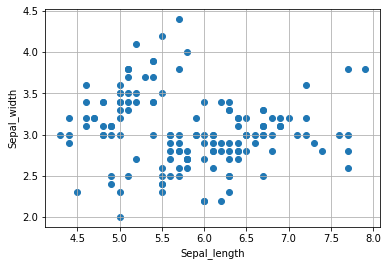

In [7]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.grid()
plt.show()

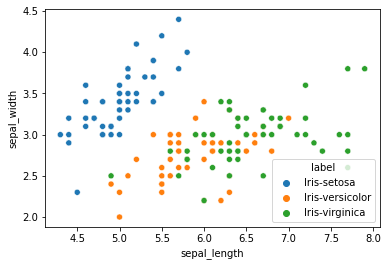

In [8]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='label')
plt.show()

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(149, 4)
(149,)


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(96, 4)
(53, 4)
(96,)
(53,)


In [48]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [51]:
# K = n_neighbors
# p=2 => Euclidean distance
m1 = KNeighborsClassifier(n_neighbors=11,p=2)  
m1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [52]:
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.9583333333333334
Testing Score 0.9433962264150944


In [53]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa']


In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [55]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[17  0  0]
 [ 0 16  0]
 [ 0  3 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.84      1.00      0.91        16
 Iris-virginica       1.00      0.85      0.92        20

       accuracy                           0.94        53
      macro avg       0.95      0.95      0.94        53
   weighted avg       0.95      0.94      0.94        53



In [57]:
k,acc = [],[]
neighbors = range(3,29,2)
for i in neighbors:
    m = KNeighborsClassifier(n_neighbors=i)
    k.append(i)
    m.fit(x_train,y_train)
    ypred = m.predict(x_test)
    accuracy = accuracy_score(y_test,ypred)
    acc.append(accuracy)

In [58]:
print(k)
print(acc)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]
[0.9622641509433962, 0.9811320754716981, 0.9811320754716981, 0.9622641509433962, 0.9433962264150944, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9622641509433962, 0.9433962264150944, 0.9622641509433962]


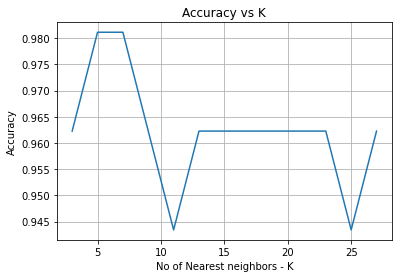

In [59]:
plt.plot(k,acc)
plt.xlabel('No of Nearest neighbors - K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.grid()
plt.show()
